In [ ]:
from google.colab import files

# Prompt to upload a file
uploaded = files.upload()

# Display the uploaded file name(s)
for file_name in uploaded.keys():
    print(f"Uploaded file: {file_name}")
import pandas as pd

# Load the dataset
data = pd.read_csv('Gran_Chaco_deforestation.csv')

Saving Gran_Chaco_deforestation.csv to Gran_Chaco_deforestation (3).csv
Uploaded file: Gran_Chaco_deforestation (3).csv


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Gran_Chaco_deforestation.csv')

# Display the first few rows of the dataset
print("Head of the data:")
print(data.head())

# Display data types of each column
print("\nData Types of each column:")
print(data.dtypes)

# Display a summary of the dataset
print("\nInformation about the dataset:")
print(data.info())

# Display summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(data.describe())


Head of the data:
   objectid     pais prov_dep municipios     meses        sup  year  month  \
0         1  Bolivia                      May 2016  14.283821  2016      5   
1         2  Bolivia                      May 2016  19.527928  2016      5   
2         3  Bolivia                      May 2016  19.741535  2016      5   
3         4  Bolivia                      May 2016  23.047651  2016      5   
4         5  Bolivia                      May 2016   3.405418  2016      5   

                     date                                globalid  \
0  2016/05/31 00:00:00+00  {BC19EEC8-DCBD-43AD-BFC8-A523BB983E42}   
1  2016/05/31 00:00:00+00  {19089C2F-7DCF-4E1C-8566-B51CB77463E3}   
2  2016/05/31 00:00:00+00  {35A3EA27-D6A5-410E-824D-D630C36F4B36}   
3  2016/05/31 00:00:00+00  {0D2419B8-EBAF-45B4-86D3-576554DDC4AD}   
4  2016/05/31 00:00:00+00  {7CEDFF53-3F09-4A41-A82D-DD0217D4E092}   

   shape_Length     shape_Area  objectid_1  time  shape_leng  
0   2960.269046  155945.925149     

<ipython-input-9-3cfa60ecf8b6>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['sup'].resample('M').sum()


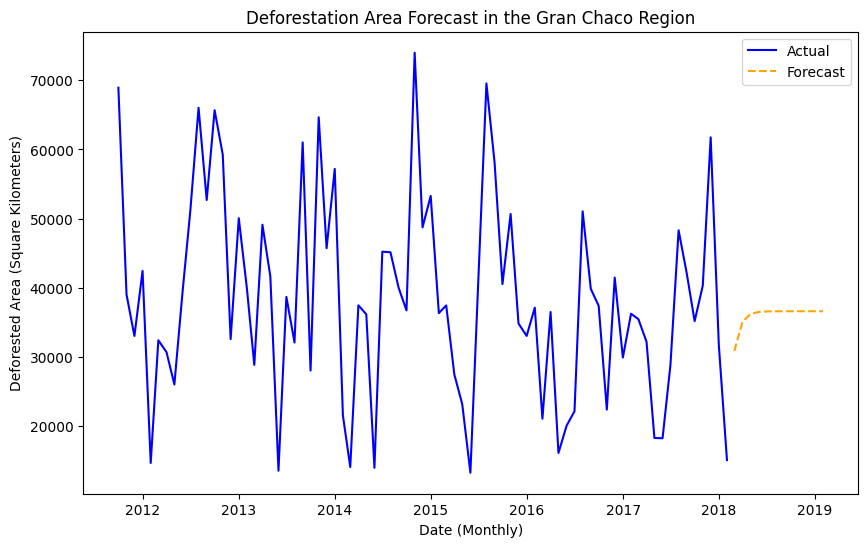

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('Gran_Chaco_deforestation.csv')

# Convert date column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Set date as index for time series analysis
data.set_index('date', inplace=True)

# Resample by month, aggregating the 'sup' (area deforested)
monthly_data = data['sup'].resample('M').sum()

# Fit an ARIMA model
model = ARIMA(monthly_data, order=(1, 1, 1))  # Modify (p, d, q) as needed
model_fit = model.fit()

# Forecast for next 12 months
forecast = model_fit.forecast(steps=12)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(monthly_data, label='Actual', color='blue')
plt.plot(forecast, label='Forecast', linestyle='--', color='orange')
plt.title('Deforestation Area Forecast in the Gran Chaco Region')
plt.xlabel('Date (Monthly)')
plt.ylabel('Deforested Area (Square Kilometers)')
plt.legend()
plt.show()


Cluster 0 (Small Deforested Areas): Center at (sup: 45.26, shape_Area: 542036.45)
Cluster 1 (Medium Deforested Areas): Center at (sup: 11782.26, shape_Area: 137452434.86)
Cluster 2 (Large Deforested Areas): Center at (sup: 2694.50, shape_Area: 31707591.13)


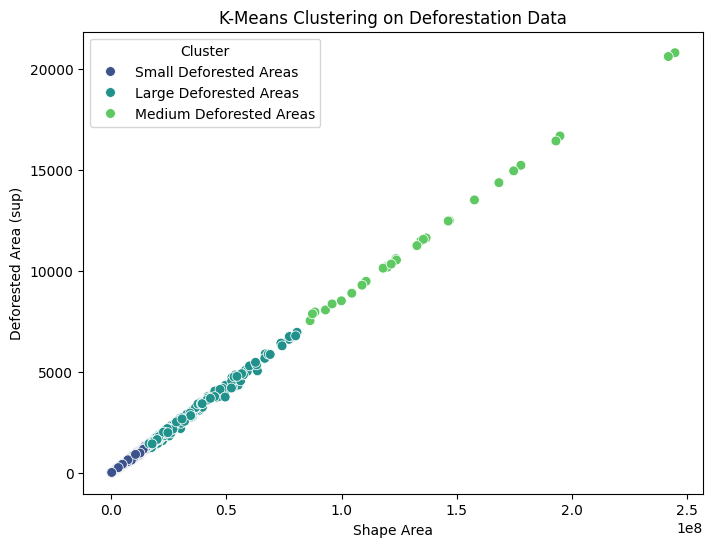

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Gran_Chaco_deforestation.csv')  # Adjust path as needed

# Select features for clustering
X = data[['sup', 'shape_Area']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
data['cluster'] = kmeans.fit_predict(X)

# Define custom names for each cluster
cluster_names = {0: "Small Deforested Areas", 1: "Medium Deforested Areas", 2: "Large Deforested Areas"}
data['cluster_name'] = data['cluster'].map(cluster_names)

# Print cluster centers with names
for i, center in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {i} ({cluster_names[i]}): Center at (sup: {center[0]:.2f}, shape_Area: {center[1]:.2f})")

# Plot the results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='shape_Area', y='sup', hue='cluster_name', palette='viridis', s=50)
plt.title("K-Means Clustering on Deforestation Data")
plt.xlabel("Shape Area")
plt.ylabel("Deforested Area (sup)")
plt.legend(title="Cluster")
plt.show()


In [ ]:
!pip install plotly


In [ ]:
print(data.columns)


In [ ]:
import pandas as pd
import plotly.express as px

# Load dataset
data = pd.read_csv('Gran_Chaco_deforestation.csv')

# Convert 'date' column to datetime format if it's not already
data['date'] = pd.to_datetime(data['date'])

# Create a year-month column for time-based aggregation
data['year_month'] = data['date'].dt.to_period('M').astype(str)

# Group data by province/department and time (prov_dep, year-month)
# Aggregate the 'sup' (deforested area) by summing over each time period
aggregated_data = data.groupby(['prov_dep', 'year_month'], as_index=False)['sup'].sum()

# Create an interactive map using Plotly Express
fig = px.choropleth(
    aggregated_data,
    locations="sup",  # Province/department as geographic locations
    color="sup",  # Color represents the deforested area (sup)
    animation_frame="year_month",  # Time dimension
    title="Deforestation Over Time by Province/Department",
    labels={'sup': 'Deforested Area (sup)', 'year_month': 'Year-Month'},
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    title="Deforestation Area by Province/Department Over Time",
    coloraxis_colorbar=dict(title="Deforested Area (sup)")
)
fig.show()


<ipython-input-18-e5fe84209bdf>:11: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [ ]:
data.head()

objectid     pais prov_dep municipios     meses        sup  year  month  \
0         1  Bolivia                      May 2016  14.283821  2016      5   
1         2  Bolivia                      May 2016  19.527928  2016      5   
2         3  Bolivia                      May 2016  19.741535  2016      5   
3         4  Bolivia                      May 2016  23.047651  2016      5   
4         5  Bolivia                      May 2016   3.405418  2016      5   

                       date                                globalid  \
0 2016-05-31 00:00:00+00:00  {BC19EEC8-DCBD-43AD-BFC8-A523BB983E42}   
1 2016-05-31 00:00:00+00:00  {19089C2F-7DCF-4E1C-8566-B51CB77463E3}   
2 2016-05-31 00:00:00+00:00  {35A3EA27-D6A5-410E-824D-D630C36F4B36}   
3 2016-05-31 00:00:00+00:00  {0D2419B8-EBAF-45B4-86D3-576554DDC4AD}   
4 2016-05-31 00:00:00+00:00  {7CEDFF53-3F09-4A41-A82D-DD0217D4E092}   

   shape_Length     shape_Area  objectid_1  time  shape_leng year_month  
0   2960.269046  155945.925149           0     0         0.0    2016-05  
1   3010.674281  213202.817274           0     0         0.0    2016-05  
2   2682.184934  215553.762204           0     0         0.0    2016-05  
3   2756.659165  251658.259223           0     0         0.0    2016-05  
4    940.983081   37368.508482           0     0         0.0    2016-05

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

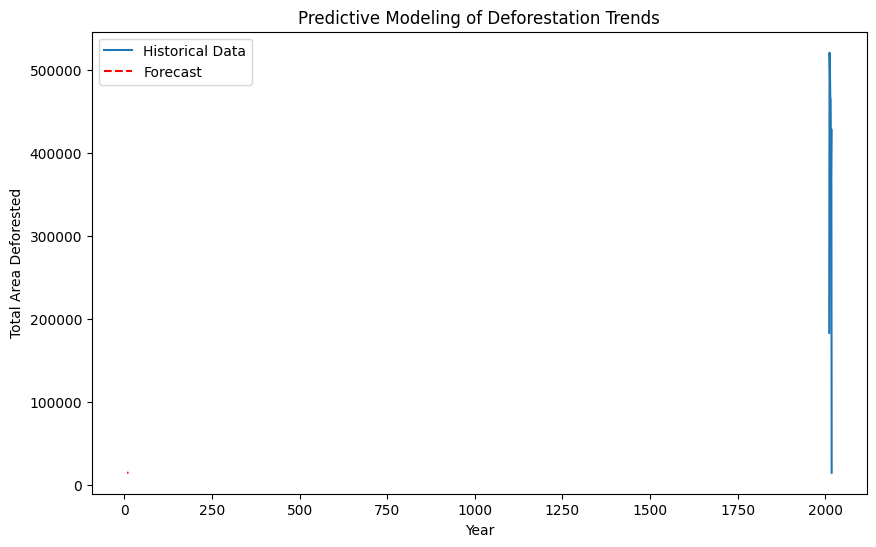

<ipython-input-15-b5c3ad038338>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=growth.index, y=growth.values, palette='coolwarm')


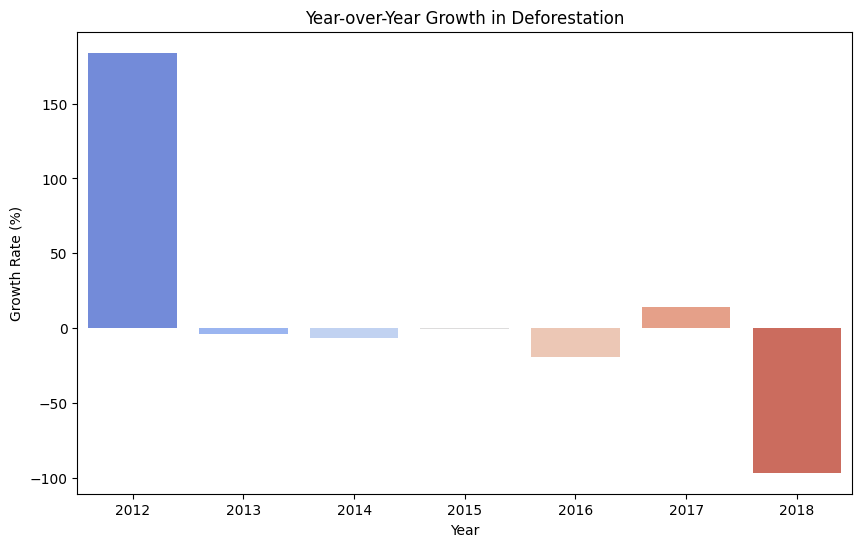

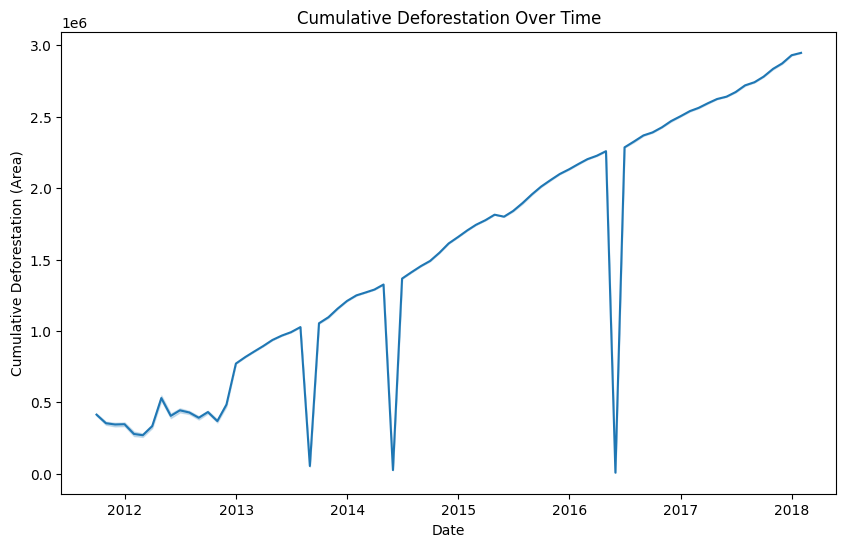

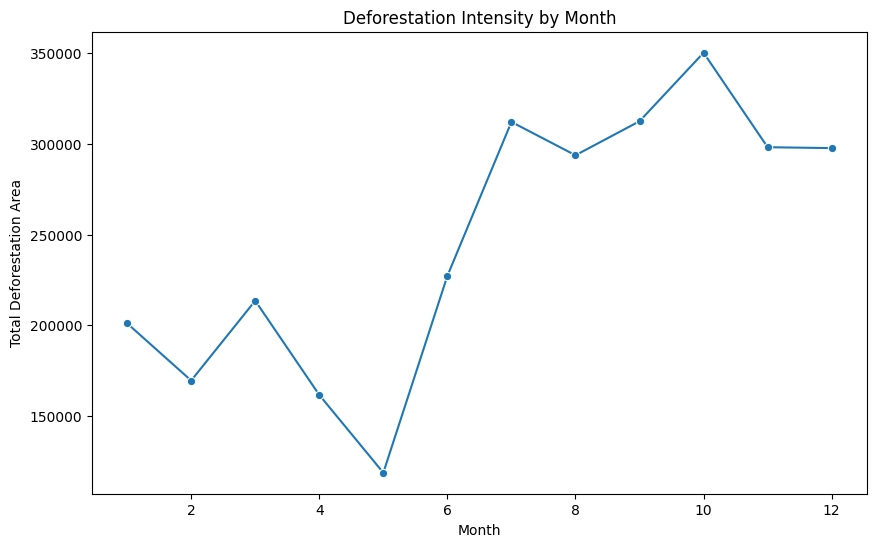

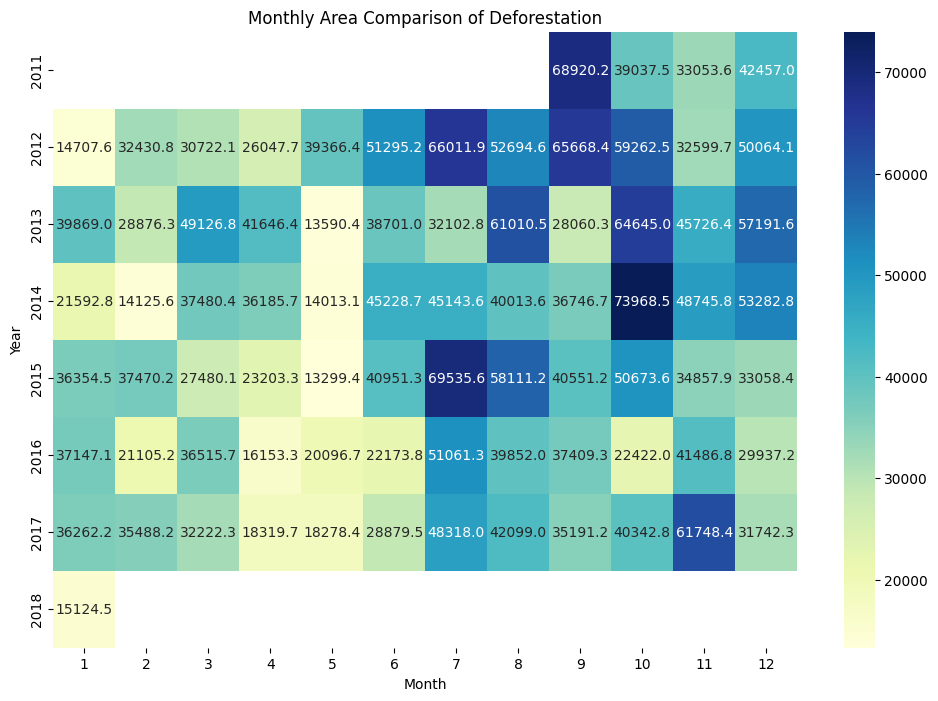

<ipython-input-15-b5c3ad038338>:109: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['date'].dt.to_period('M')


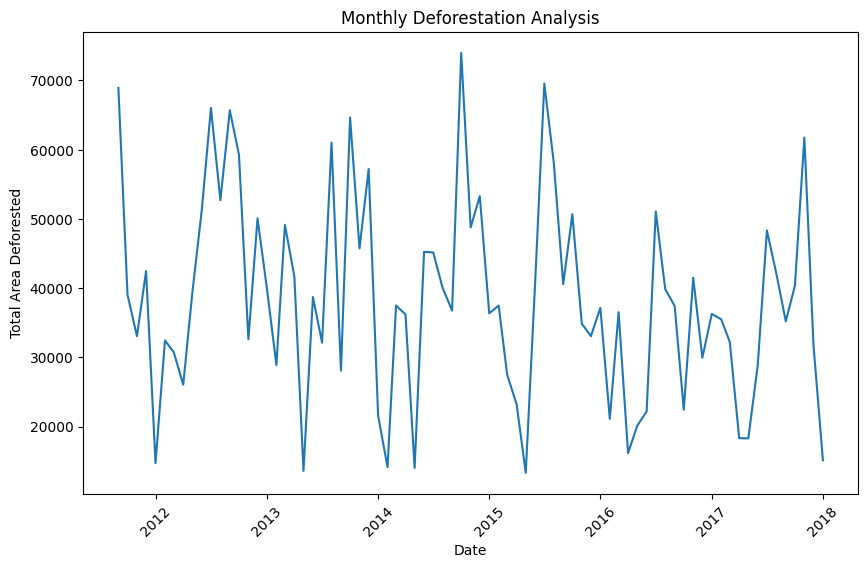

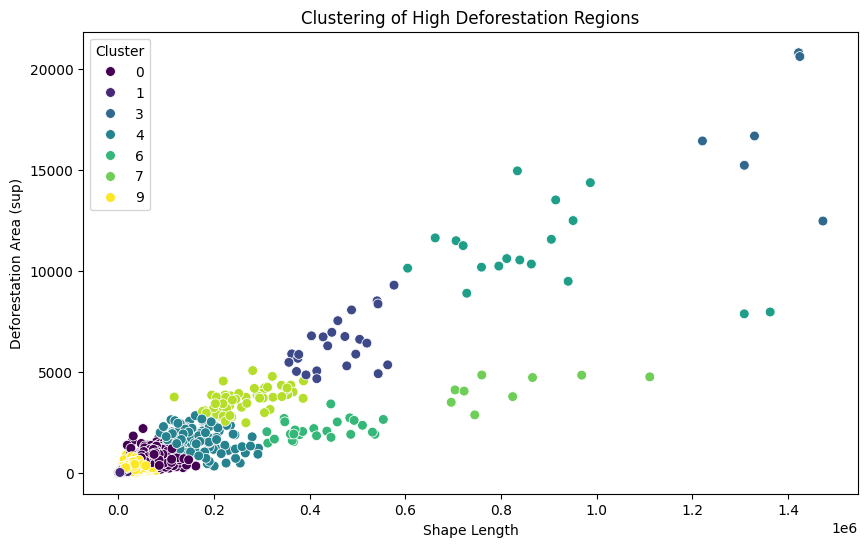

In [ ]:
# Load data
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler  # Ensure this line is present
from statsmodels.tsa.arima.model import ARIMA
import warnings
# Replace 'deforestation_data.csv' with your actual data file path
df = data

# Ensure 'sup' (affected area) is numeric
df['sup'] = pd.to_numeric(df['sup'], errors='coerce')
df.dropna(subset=['sup'], inplace=True)

# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract month and year from the date column
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Function for predictive modeling of deforestation trends
def predictive_modeling(df):
    # Group by year and sum the 'sup' column
    yearly_data = df.groupby('year')['sup'].sum()

    # Check if yearly_data has enough entries for modeling
    if len(yearly_data) < 3:
        print("Not enough data for predictive modeling.")
        return

    # Apply ARIMA
    try:
        model = ARIMA(yearly_data, order=(1, 1, 1))
        model_fit = model.fit()
        forecast = model_fit.get_forecast(steps=5)
        forecast_index = np.arange(len(yearly_data), len(yearly_data) + 5)
        forecast_values = forecast.predicted_mean

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.plot(yearly_data.index, yearly_data.values, label='Historical Data')
        plt.plot(forecast_index, forecast_values, color='red', linestyle='dashed', label='Forecast')
        plt.xlabel('Year')
        plt.ylabel('Total Area Deforested')
        plt.title('Predictive Modeling of Deforestation Trends')
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"An error occurred during predictive modeling: {e}")


# Function for year-over-year growth in deforestation
def year_over_year_growth(df):
    yearly_data = df.groupby('year')['sup'].sum()
    growth = yearly_data.pct_change().dropna() * 100

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=growth.index, y=growth.values, palette='coolwarm')
    plt.xlabel('Year')
    plt.ylabel('Growth Rate (%)')
    plt.title('Year-over-Year Growth in Deforestation')
    plt.show()

# Function for cumulative deforestation over time
def cumulative_deforestation(df):
    df['cumulative_sup'] = df['sup'].cumsum()

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=df['date'], y=df['cumulative_sup'])
    plt.xlabel('Date')
    plt.ylabel('Cumulative Deforestation (Area)')
    plt.title('Cumulative Deforestation Over Time')
    plt.show()

# Function for deforestation intensity by month
def deforestation_intensity_by_month(df):
    monthly_data = df.groupby('month')['sup'].sum()

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=monthly_data.index, y=monthly_data.values, marker='o')
    plt.xlabel('Month')
    plt.ylabel('Total Deforestation Area')
    plt.title('Deforestation Intensity by Month')
    plt.show()

# Function for monthly area comparison (sup)
def monthly_area_comparison(df):
    monthly_comparison = df.groupby(['year', 'month'])['sup'].sum().unstack()

    # Plotting
    plt.figure(figsize=(12, 8))
    sns.heatmap(monthly_comparison, cmap='YlGnBu', annot=True, fmt='.1f')
    plt.xlabel('Month')
    plt.ylabel('Year')
    plt.title('Monthly Area Comparison of Deforestation')
    plt.show()

# Function for monthly deforestation analysis
def monthly_deforestation_analysis(df):
    df['year_month'] = df['date'].dt.to_period('M')
    monthly_data = df.groupby('year_month')['sup'].sum()

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=monthly_data.index.to_timestamp(), y=monthly_data.values)
    plt.xlabel('Date')
    plt.ylabel('Total Area Deforested')
    plt.title('Monthly Deforestation Analysis')
    plt.xticks(rotation=45)
    plt.show()

# Function for clustering high deforestation regions
def clustering_high_deforestation_regions(df):
    features = df[['shape_Length', 'sup']]
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    kmeans = KMeans(n_clusters=10, random_state=42)
    df['cluster'] = kmeans.fit_predict(features_scaled)

    # Plotting clusters on scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='shape_Length', y='sup', hue='cluster', palette='viridis', s=50)
    plt.xlabel('Shape Length')
    plt.ylabel('Deforestation Area (sup)')
    plt.title('Clustering of High Deforestation Regions')
    plt.legend(title='Cluster')
    plt.show()

    # Map visualization of clusters (using plotly for interactivity)
    fig = px.scatter_mapbox(df, lat="shape_Length", lon="shape_leng", color="cluster", size="sup",
                            hover_name="pais", mapbox_style="carto-positron",
                            zoom=4, title="Deforestation Clusters by Region")
    fig.show()

# Run all visualizations
predictive_modeling(df)
year_over_year_growth(df)
cumulative_deforestation(df)
deforestation_intensity_by_month(df)
monthly_area_comparison(df)
monthly_deforestation_analysis(df)
clustering_high_deforestation_regions(df)


In [ ]:
import plotly.express as px

# Example DataFrame (df) should have a 'municipios' column with region names
# and a 'sup' column with deforestation area.

# Create a choropleth map
fig = px.choropleth(df,
                    locations='municipios',  # Column with region names
                    locationmode='country names',  # Match with 'pais' (e.g., 'Bolivia')
                    color='sup',  # Column for coloring
                    hover_name='municipios',  # Info shown on hover
                    title='Deforestation by Municipio in Bolivia',
                    color_continuous_scale='Viridis')

fig.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load your geographical data (e.g., a shapefile of Bolivia's municipalities)
gdf = gpd.read_file('Gran_Chaco_deforestation.csv')  # Adjust the file path

# Rename the columns in df to avoid conflicts
df_renamed = df.rename(columns={
    "sup": "deforestation_sup",  # Rename 'sup' to avoid conflict
    "objectid": "objectid_df",    # Rename 'objectid' to differentiate
    "year": "year_df",            # Rename 'year' to differentiate
    # Add other columns as needed
})

# Merge your df with the geodataframe based on 'municipios'
merged = gdf.set_index('municipios').join(df_renamed.set_index('municipios'))

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged.boundary.plot(ax=ax, linewidth=1)
merged.plot(column='deforestation_sup', ax=ax, legend=True,
            legend_kwds={'label': "Total Area Deforested",
                         'orientation': "horizontal"},
            cmap='OrRd')
plt.title('Deforestation in Bolivia by Municipio')
plt.show()


ValueError: columns overlap but no suffix specified: Index(['pais', 'prov_dep', 'meses', 'month', 'date', 'globalid',
       'shape_Length', 'shape_Area', 'objectid_1', 'time', 'shape_leng'],
      dtype='object')